# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import time

from pprint import pprint
# regressions
from scipy.stats import linregress

# Import API key
from api_keys_Elyssa import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
# output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [3]:
cities[0:5]

['figeac', 'airai', 'mataura', 'bereda', 'yambio']

In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [5]:
 # Build query URL and request your results in Celsius
city = "mnogovershinnyy"
query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

# Get weather data
weather_response = requests.get(query_url)
print(weather_response.status_code)
weather_json = weather_response.json()

200


In [6]:
type(weather_json)

dict

In [7]:
weather_json.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [8]:
pprint(weather_json)

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 53.9353, 'lon': 139.9242},
 'dt': 1644208088,
 'id': 2019935,
 'main': {'feels_like': -6.5,
          'grnd_level': 969,
          'humidity': 71,
          'pressure': 1016,
          'sea_level': 1016,
          'temp': 5.45,
          'temp_max': 5.45,
          'temp_min': 5.45},
 'name': 'Mnogovershinnyy',
 'sys': {'country': 'RU', 'sunrise': 1644185838, 'sunset': 1644219094},
 'timezone': 36000,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 293, 'gust': 12.59, 'speed': 7}}


In [9]:
lat = weather_json["coord"]["lat"]
lng = weather_json["coord"]["lon"]
country = weather_json["sys"]["country"]
cloudiness = weather_json["clouds"]["all"]

date_dt = weather_json["dt"]
city_name = weather_json["name"]
wind = weather_json["wind"]["speed"]

temp = weather_json["main"]['temp']
pressure = weather_json["main"]['pressure']
humidity = weather_json["main"]['humidity']

In [10]:
pressure

1016

In [11]:
#check last 10 cities
cities[-10:]

['novyy urengoy',
 'salym',
 'haines junction',
 'cantaura',
 'batouri',
 'bagar',
 'el alto',
 'prachatice',
 'kikwit',
 'sao gabriel da cachoeira']

In [12]:
650/60

10.833333333333334

In [13]:
lats = []
lngs = []
countries = []
clouds = []
dates = []
names = []
winds = []
temps = []
pressures = []
humids = []

for city in cities[0:60]:
    
    # make request
    print(city)
    
    # Build query URL and request your results in Celsius
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Get weather data
    weather_response = requests.get(query_url)
    print(weather_response.status_code)
    print()

    
    
    try:
        # get data
        weather_json = weather_response.json()

        # parse the data
        lat = weather_json["coord"]["lat"]
        lng = weather_json["coord"]["lon"]
        country = weather_json["sys"]["country"]
        cloudiness = weather_json["clouds"]["all"]

        date_dt = weather_json["dt"]
        city_name = weather_json["name"]
        wind = weather_json["wind"]["speed"]

        temp = weather_json["main"]['temp']
        pressure = weather_json["main"]['pressure']
        humidity = weather_json["main"]['humidity']
        
#     lat = weather_json.get("coord").get("lat")
#     lng = weather_json.get("coord").get("lon")
#     country = weather_json.get("sys").get("country")
#     cloudiness = weather_json.get("clouds").get("all")

#     date_dt = weather_json.get("dt")
#     city_name = weather_json.get("name")
#     wind = weather_json.get("wind").get("speed")

#     temp = weather_json.get("main").get("temp")
#     pressure = weather_json.get("main").get("pressure")
#     humidity = weather_json.get("main").get("humidity")

        # slap into lists
        lats.append(lat)
        lngs.append(lng)
        countries.append(country)
        clouds.append(cloudiness)
        dates.append(date_dt)
        names.append(city_name)
        winds.append(wind)
        temps.append(temp)
        pressures.append(pressure)
        humids.append(humidity)
            
    except Exception as e:
        print(e)
        
        # slap into lists
        lats.append(np.nan)
        lngs.append(np.nan)
        countries.append(None)
        clouds.append(np.nan)
        dates.append(np.nan)
        names.append(city)
        winds.append(np.nan)
        temps.append(np.nan)
        pressures.append(np.nan)
        humids.append(np.nan)
        
    time.sleep(1)    

       
    


figeac
200

airai
200

mataura
200

bereda
200

yambio
200

vaini
200

khatanga
200

chuy
200

port alfred
200

rikitea
200

atuona
200

bengkulu
200

nikolskoye
200

grindavik
200

upernavik
200

qaanaaq
200

washington
200

busselton
200

ushuaia
200

bali
200

taolanaro
404

'coord'
marsh harbour
200

saskylakh
200

cidreira
200

cape town
200

abalak
200

hermanus
200

watertown
200

punta arenas
200

longyearbyen
200

atikokan
200

victoria
200

iberia
200

jamestown
200

hobart
200

adamas
200

utiroa
404

'coord'
rocha
200

chokurdakh
200

thompson
200

kindu
200

albany
200

tasiilaq
200

semporna
200

bluff
200

matameye
404

'coord'
saint-philippe
200

mogzon
200

tecoanapa
200

talnakh
200

vieques
200

cabo san lucas
200

narsaq
200

sentyabrskiy
404

'coord'
leninskoye
200

belushya guba
404

'coord'
tidore
404

'coord'
nouadhibou
200

kahului
200

ous
200



In [14]:
df = pd.DataFrame()

df["City"] = names
df["Country"] = countries
df["Latitude"] = lats
df["Longitude"] = lngs
df["Date"] = dates
df["Wind_Speed"] = winds
df["Pressure"] = pressures
df["Humidity"] = humids
df["Temperature"] = temps
df["Cloudiness"] = clouds

df.head(190)

,City,Country,Latitude,Longitude,Date,Wind_Speed,Pressure,Humidity,Temperature,Cloudiness
0,Arrondissement de Figeac,FR,44.7500,1.9167,1.644208e+09,10.29,1025.0,97.0,42.19,100.0
1,Airai,TL,-8.9266,125.4092,1.644208e+09,2.59,1010.0,67.0,74.08,47.0
2,Mataura,NZ,-46.1927,168.8643,1.644208e+09,4.63,1018.0,38.0,60.48,6.0
3,Bereda,ES,43.2686,-7.5406,1.644208e+09,1.74,1034.0,98.0,38.66,60.0
4,Yambio,SS,4.5721,28.3955,1.644208e+09,4.25,1012.0,25.0,63.66,94.0
5,Vaini,TO,-21.2000,-175.2000,1.644208e+09,11.50,1010.0,100.0,75.36,100.0
6,Khatanga,RU,71.9667,102.5000,1.644208e+09,9.86,1032.0,98.0,-17.36,100.0
7,Chui,UY,-33.6971,-53.4616,1.644208e+09,13.44,1011.0,82.0,62.26,39.0
8,Port Alfred,ZA,-33.5906,26.8910,1.644208e+09,3.91,1013.0,77.0,73.33,69.0
9,Rikitea,PF,-23.1203,-134.9692,1.644208e+09,18.37,1020.0,72.0,79.00,12.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         60 non-null     object 
 1   Country      54 non-null     object 
 2   Latitude     54 non-null     float64
 3   Longitude    54 non-null     float64
 4   Date         54 non-null     float64
 5   Wind_Speed   54 non-null     float64
 6   Pressure     54 non-null     float64
 7   Humidity     54 non-null     float64
 8   Temperature  54 non-null     float64
 9   Cloudiness   54 non-null     float64
dtypes: float64(8), object(2)
memory usage: 4.8+ KB


In [16]:
df.to_csv("my_data_Elyssa.csv", index=False)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         60 non-null     object 
 1   Country      54 non-null     object 
 2   Latitude     54 non-null     float64
 3   Longitude    54 non-null     float64
 4   Date         54 non-null     float64
 5   Wind_Speed   54 non-null     float64
 6   Pressure     54 non-null     float64
 7   Humidity     54 non-null     float64
 8   Temperature  54 non-null     float64
 9   Cloudiness   54 non-null     float64
dtypes: float64(8), object(2)
memory usage: 4.8+ KB


In [18]:
#  Get the indices of cities that have humidity over 100%.
df.describe()

,Latitude,Longitude,Date,Wind_Speed,Pressure,Humidity,Temperature,Cloudiness
count,54.000000,54.000000,5.400000e+01,54.000000,54.000000,54.000000,54.000000,54.000000
mean,18.318335,0.931906,1.644208e+09,9.735926,1013.851852,78.981481,43.196481,60.240741
std,41.355865,92.972399,1.147091e+02,11.389862,14.762788,17.862674,34.812381,38.404469
min,-54.800000,-175.200000,1.644207e+09,0.000000,967.000000,25.000000,-40.050000,0.000000
25%,-21.318875,-71.116275,1.644208e+09,4.007500,1011.000000,71.250000,18.115000,27.250000
50%,22.588200,-2.811950,1.644208e+09,7.055000,1014.000000,78.500000,60.470000,72.000000
75%,54.743500,83.644500,1.644208e+09,11.500000,1023.000000,94.750000,70.825000,100.000000
max,78.218600,168.864300,1.644208e+09,61.000000,1034.000000,100.000000,88.000000,100.000000


In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

mask = df.Humidity <= 100
df_sub = df.loc[mask].dropna().reset_index(drop=True)

In [20]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         54 non-null     object 
 1   Country      54 non-null     object 
 2   Latitude     54 non-null     float64
 3   Longitude    54 non-null     float64
 4   Date         54 non-null     float64
 5   Wind_Speed   54 non-null     float64
 6   Pressure     54 non-null     float64
 7   Humidity     54 non-null     float64
 8   Temperature  54 non-null     float64
 9   Cloudiness   54 non-null     float64
dtypes: float64(8), object(2)
memory usage: 4.3+ KB


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

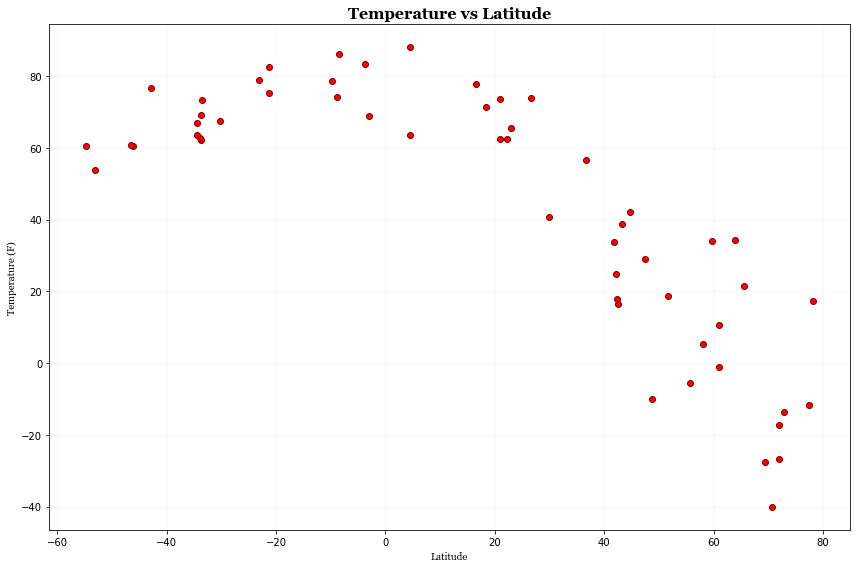

In [21]:
plt.figure(figsize=(12,8))

plt.scatter(df_sub.Latitude, df_sub.Temperature, edgecolor="maroon", color="r")

plt.title("Temperature vs Latitude", fontweight="bold", fontsize=16, fontname="Georgia")
plt.xlabel("Latitude", fontname="Georgia")
plt.ylabel("Temperature (F)", fontname="Georgia")

plt.grid(axis="both", alpha=0.1)

plt.tight_layout()
plt.savefig("temp_lat_elyssa.png")
plt.show()

## Latitude vs. Humidity Plot

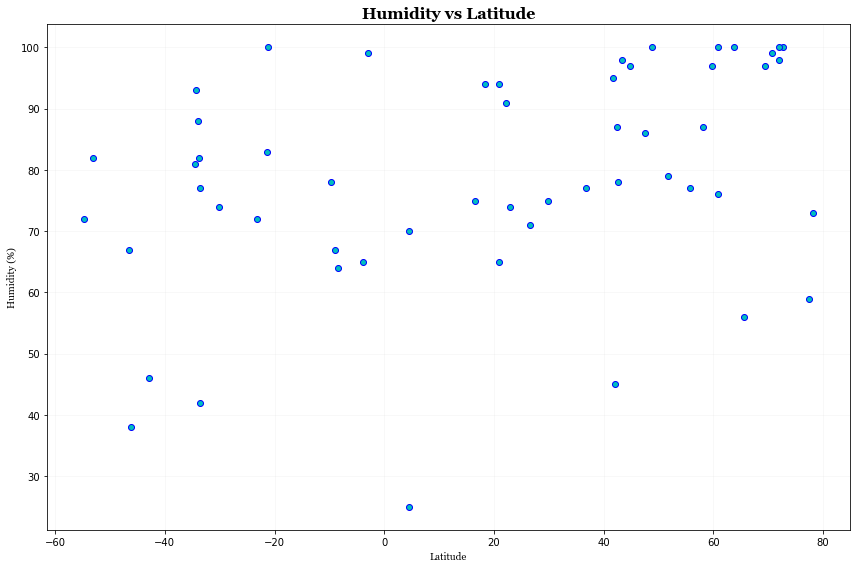

In [22]:
plt.figure(figsize=(12,8))

plt.scatter(df_sub.Latitude, df_sub.Humidity, color="c", edgecolor="b")

plt.title("Humidity vs Latitude", fontweight="bold", fontsize=16, fontname="Georgia")
plt.xlabel("Latitude", fontname="Georgia")
plt.ylabel("Humidity (%)", fontname="Georgia")

plt.grid(axis="both", alpha=0.1)

plt.tight_layout()
plt.savefig("humid_lat_elyssa.png")
plt.show()

## Latitude vs. Cloudiness Plot

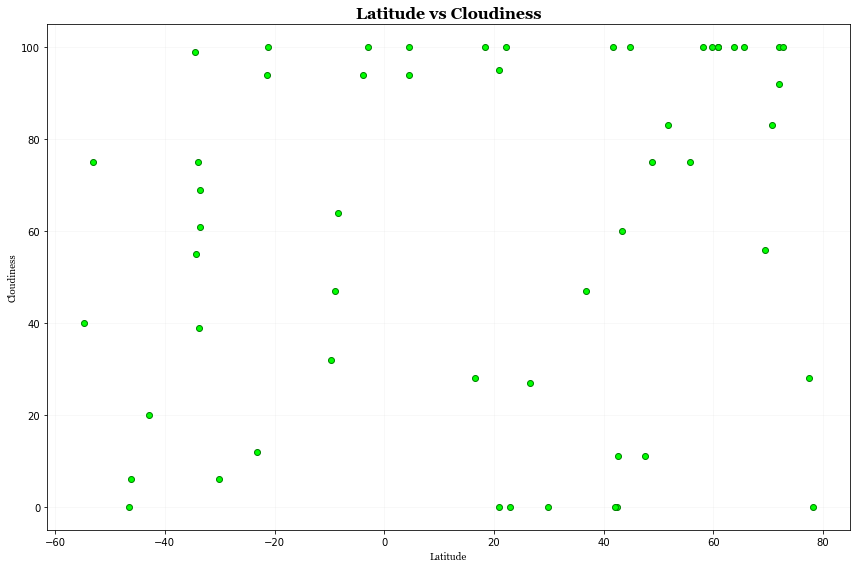

In [23]:
plt.figure(figsize=(12,8))

plt.scatter(df_sub.Latitude, df_sub.Cloudiness, color="lime", edgecolor="g")

plt.title("Latitude vs Cloudiness", fontweight="bold", fontsize=16, fontname="Georgia")
plt.xlabel("Latitude", fontname="Georgia")
plt.ylabel("Cloudiness", fontname="Georgia")

plt.grid(axis="both", alpha=0.1)

plt.tight_layout()
plt.savefig("cloud_lat_elyssa.png")
plt.show()

## Latitude vs. Wind Speed Plot

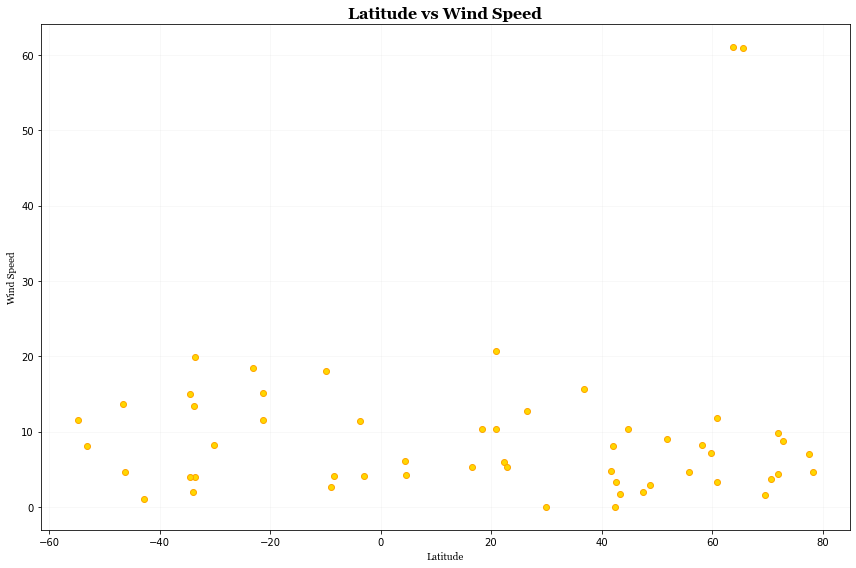

In [24]:
plt.figure(figsize=(12,8))

plt.scatter(df_sub.Latitude, df_sub.Wind_Speed, color="gold", edgecolor="orange")

plt.title("Latitude vs Wind Speed", fontweight="bold", fontsize=16, fontname="Georgia")
plt.xlabel("Latitude", fontname="Georgia")
plt.ylabel("Wind Speed", fontname="Georgia")

plt.grid(axis="both", alpha=0.1)

plt.tight_layout()
plt.savefig("wind_lat_elyssa.png")
plt.show()

## Linear Regression

In [25]:
# linear modelling
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [26]:
df_north = df_sub.loc[df_sub.Latitude >= 0]
df_south = df_sub.loc[df_sub.Latitude < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7664228503211495


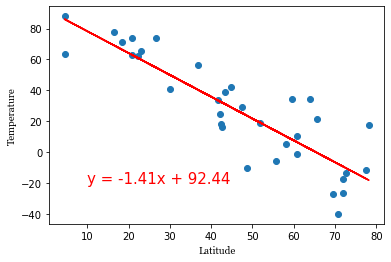

In [27]:
# Print out the r-squared value along with the plot.
x_values = df_north['Latitude']
y_values = df_north['Temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
plt.xlabel('Latitude', fontname="Georgia")
plt.ylabel('Temperature', fontname="Georgia")

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [28]:
feature = df_north[["Latitude"]]
target = df_north["Temperature"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Temperature   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     105.0
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           1.24e-11
Time:                        22:29:27   Log-Likelihood:                -143.45
No. Observations:                  34   AIC:                             290.9
Df Residuals:                      32   BIC:                             294.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         92.4398      6.993     13.218      0.000      78.195     106.685
Latitude      -1.4146      0.138    -10.247      0.000      -1.696      -1.133
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.306
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.111
Skew:                           0.051   Prob(JB):                        0.946
Kurtosis:                       2.740   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
reg = LinearRegression()
reg.fit(np.array(feature), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[-1.41457555]
92.43975877056923


In [30]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [31]:
actual = df_north["Temperature"]
predictions = reg.predict(df_north["Latitude"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: 0.76642285032115
MSE: 270.5765159375854
RMSE: 16.449210191908467
MAE: 12.852916898516417


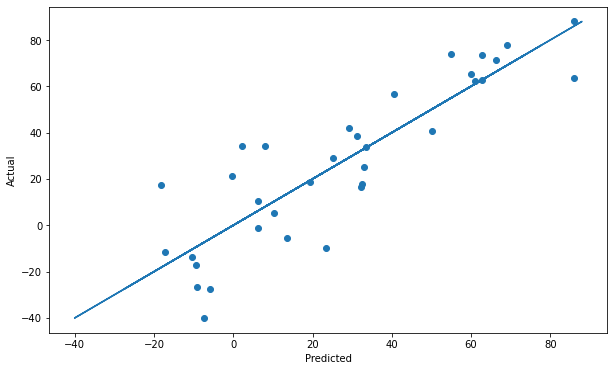

In [32]:
plt.figure(figsize=(10,6))

plt.scatter(predictions, actual)
plt.plot(actual, actual)

plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

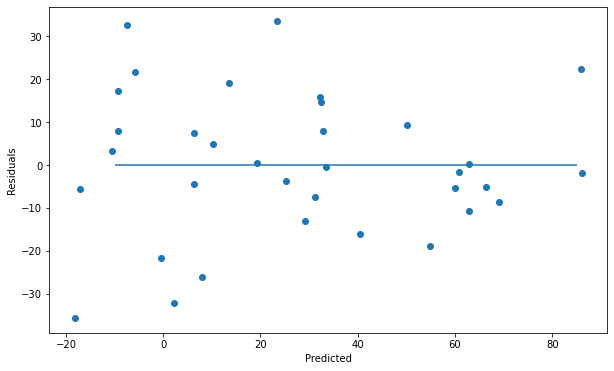

In [33]:
residuals = predictions - actual

plt.figure(figsize=(10,6))

plt.scatter(predictions, residuals)
plt.hlines(0, -10, 85)

plt.xlabel("Predicted")
plt.ylabel("Residuals")

plt.show()

# Heteroscedasticity! 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5664129114960549


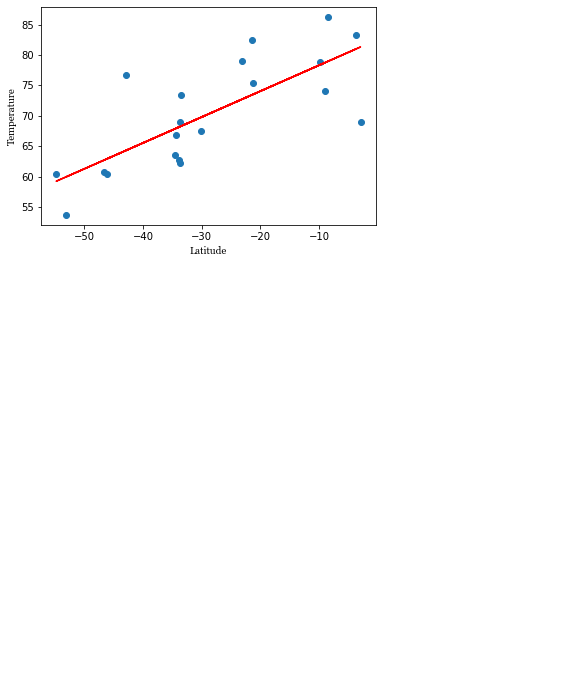

In [34]:
# Print out the r-squared value along with the plot.
x_values = df_south['Latitude']
y_values = df_south['Temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
plt.xlabel('Latitude', fontname="Georgia")
plt.ylabel('Temperature', fontname="Georgia")

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [35]:
feature = df_south[["Latitude"]]
target = df_south["Temperature"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Temperature   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     23.51
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           0.000129
Time:                        22:29:27   Log-Likelihood:                -63.566
No. Observations:                  20   AIC:                             131.1
Df Residuals:                      18   BIC:                             133.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         82.5708      2.882     28.651      0.000      76.516      88.626
Latitude       0.4261      0.088      4.849      0.000       0.241       0.611
==============================================================================
Omnibus:                        0.267   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.875   Jarque-Bera (JB):                0.168
Skew:                           0.189   Prob(JB):                        0.919
Kurtosis:                       2.758   Cond. No.                         69.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
reg = LinearRegression()
reg.fit(np.array(feature), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[0.42608493]
82.57083309582426


In [37]:
actual = df_south["Temperature"]
predictions = reg.predict(df_south["Latitude"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: 0.5664129114960548
MSE: 33.740035750741924
RMSE: 5.808617369972128
MAE: 4.657299052753336


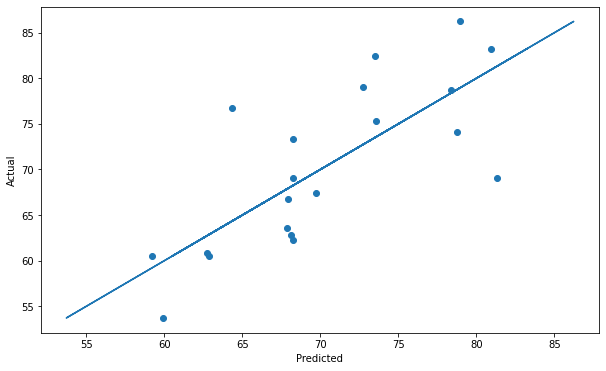

In [38]:
plt.figure(figsize=(10,6))

plt.scatter(predictions, actual)
plt.plot(actual, actual)

plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

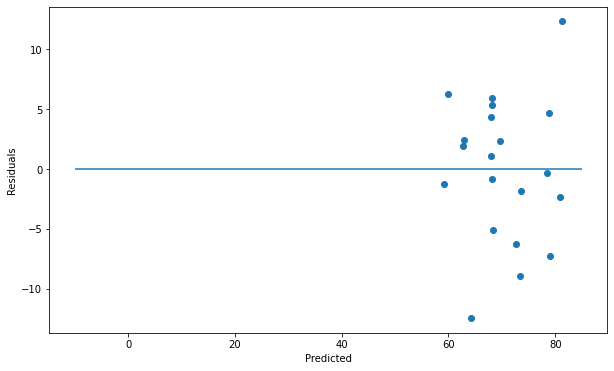

In [39]:
residuals = predictions - actual

plt.figure(figsize=(10,6))

plt.scatter(predictions, residuals)
plt.hlines(0, -10, 85)

plt.xlabel("Predicted")
plt.ylabel("Residuals")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1341372889886727


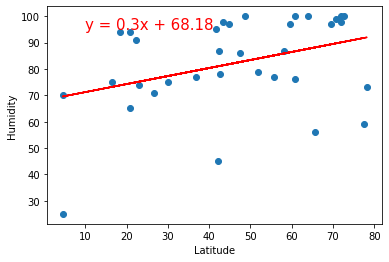

In [40]:
# Print out the r-squared value along with the plot.
x_values = df_north['Latitude']
y_values = df_north['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(10,95),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [41]:
feature = df_north[["Latitude"]]
target = df_north["Humidity"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Humidity   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     4.957
Date:                Sun, 06 Feb 2022   Prob (F-statistic):             0.0331
Time:                        22:29:28   Log-Likelihood:                -143.14
No. Observations:                  34   AIC:                             290.3
Df Residuals:                      32   BIC:                             293.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         68.1759      6.929      9.840      0.000      54.063      82.289
Latitude       0.3045      0.137      2.227      0.033       0.026       0.583
==============================================================================
Omnibus:                        9.088   Durbin-Watson:                   2.186
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.016
Skew:                          -1.145   Prob(JB):                       0.0182
Kurtosis:                       3.642   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
reg = LinearRegression()
reg.fit(np.array(feature), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[0.30453017]
68.17586749134597


In [43]:
actual = df_north["Humidity"]
predictions = reg.predict(df_north["Latitude"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: 0.1341372889886724
MSE: 265.6048846350967
RMSE: 16.297388890098215
MAE: 12.473695370491589


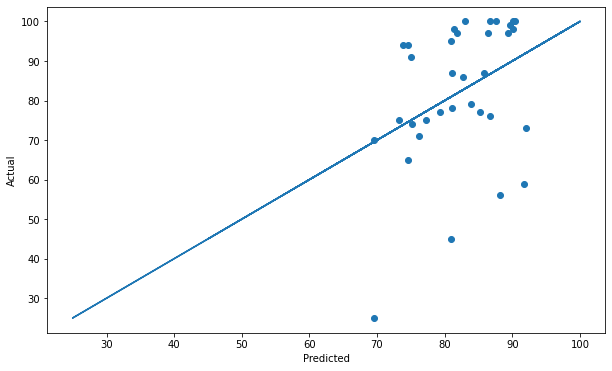

In [44]:
plt.figure(figsize=(10,6))

plt.scatter(predictions, actual)
plt.plot(actual, actual)

plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

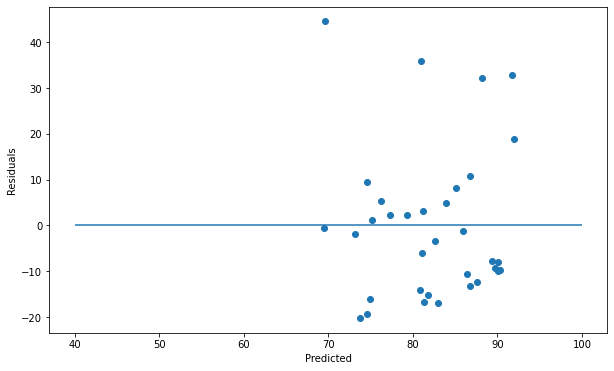

In [45]:
residuals = predictions - actual

plt.figure(figsize=(10,6))

plt.scatter(predictions, residuals)
plt.hlines(0, 40, 100)

plt.xlabel("Predicted")
plt.ylabel("Residuals")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.062321530522267875


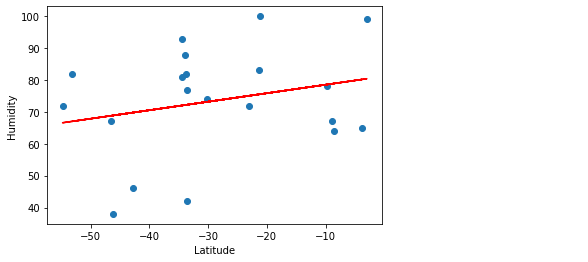

In [46]:
# Print out the r-squared value along with the plot.
x_values = df_south['Latitude']
y_values = df_south['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(10,95),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [47]:
feature = df_south[["Latitude"]]
target = df_south["Humidity"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Humidity   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.196
Date:                Sun, 06 Feb 2022   Prob (F-statistic):              0.288
Time:                        22:29:28   Log-Likelihood:                -83.952
No. Observations:                  20   AIC:                             171.9
Df Residuals:                      18   BIC:                             173.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         81.1870      7.987     10.165      0.000      64.407      97.967
Latitude       0.2663      0.244      1.094      0.288      -0.245       0.778
==============================================================================
Omnibus:                        1.420   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.492   Jarque-Bera (JB):                1.227
Skew:                          -0.467   Prob(JB):                        0.542
Kurtosis:                       2.227   Cond. No.                         69.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
reg = LinearRegression()
reg.fit(np.array(feature), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[0.26634454]
81.18702963877483


In [49]:
actual = df_south["Humidity"]
predictions = reg.predict(df_south["Latitude"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: 0.062321530522267854
MSE: 259.12744504017127
RMSE: 16.097435977203677
MAE: 13.216341264855924


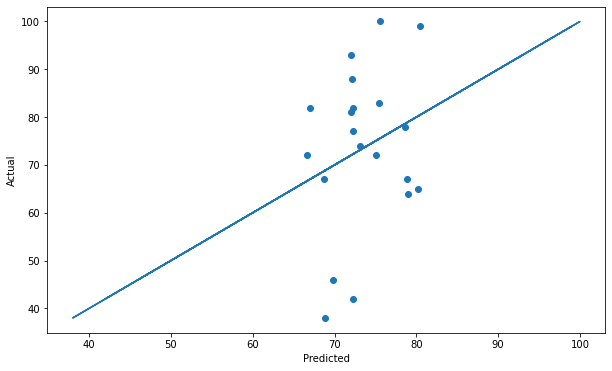

In [50]:
plt.figure(figsize=(10,6))

plt.scatter(predictions, actual)
plt.plot(actual, actual)

plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

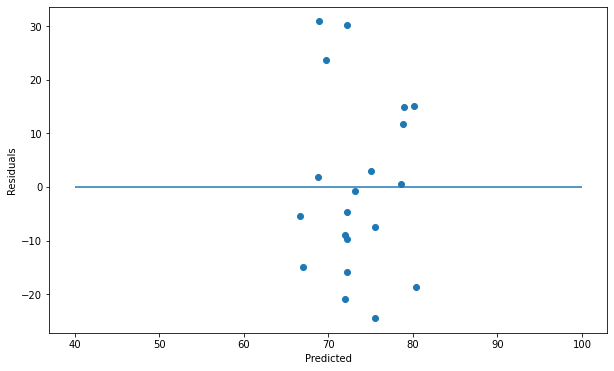

In [51]:
residuals = predictions - actual

plt.figure(figsize=(10,6))

plt.scatter(predictions, residuals)
plt.hlines(0, 40, 100)

plt.xlabel("Predicted")
plt.ylabel("Residuals")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.02329773239117543


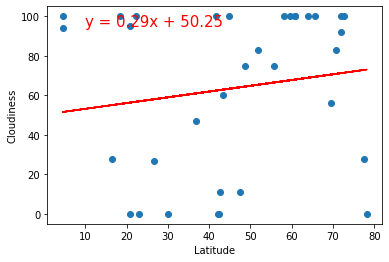

In [52]:
# Print out the r-squared value along with the plot.
x_values = df_north['Latitude']
y_values = df_north['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(10,95),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [53]:
feature = df_north[["Latitude"]]
target = df_north["Cloudiness"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Cloudiness   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.7633
Date:                Sun, 06 Feb 2022   Prob (F-statistic):              0.389
Time:                        22:29:29   Log-Likelihood:                -173.44
No. Observations:                  34   AIC:                             350.9
Df Residuals:                      32   BIC:                             353.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.2519     16.895      2.974      0.006      15.837      84.667
Latitude       0.2914      0.334      0.874      0.389      -0.388       0.971
==============================================================================
Omnibus:                       12.081   Durbin-Watson:                   1.782
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                3.985
Skew:                          -0.517   Prob(JB):                        0.136
Kurtosis:                       1.680   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
reg = LinearRegression()
reg.fit(np.array(feature), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[0.29138801]
50.251928300819


In [55]:
actual = df_north["Cloudiness"]
predictions = reg.predict(df_north["Latitude"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: 0.023297732391175385
MSE: 1579.3115136585172
RMSE: 39.740552508219075
MAE: 35.844431248924224


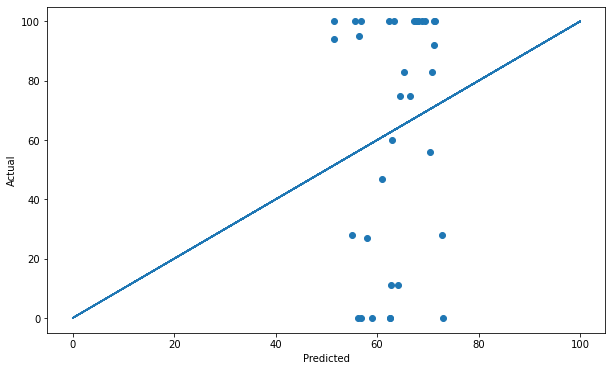

In [56]:
plt.figure(figsize=(10,6))

plt.scatter(predictions, actual)
plt.plot(actual, actual)

plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

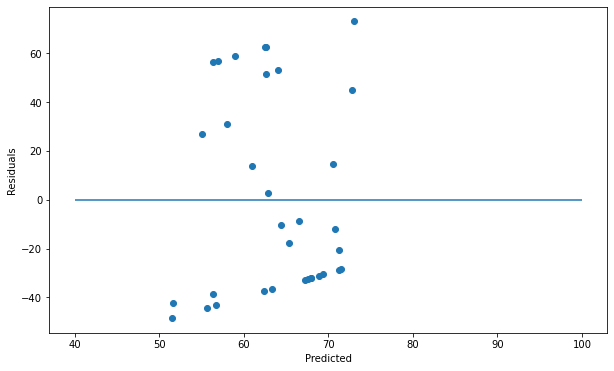

In [57]:
residuals = predictions - actual

plt.figure(figsize=(10,6))

plt.scatter(predictions, residuals)
plt.hlines(0, 40, 100)

plt.xlabel("Predicted")
plt.ylabel("Residuals")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1517768114109959


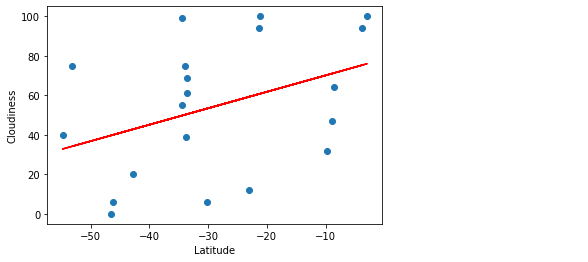

In [58]:
# Print out the r-squared value along with the plot.
x_values = df_south['Latitude']
y_values = df_south['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(10,95),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [59]:
feature = df_south[["Latitude"]]
target = df_south["Cloudiness"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Cloudiness   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     3.221
Date:                Sun, 06 Feb 2022   Prob (F-statistic):             0.0895
Time:                        22:29:30   Log-Likelihood:                -96.813
No. Observations:                  20   AIC:                             197.6
Df Residuals:                      18   BIC:                             199.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         78.3928     15.193      5.160      0.000      46.474     110.312
Latitude       0.8313      0.463      1.795      0.090      -0.142       1.804
==============================================================================
Omnibus:                        4.269   Durbin-Watson:                   2.376
Prob(Omnibus):                  0.118   Jarque-Bera (JB):                1.469
Skew:                          -0.117   Prob(JB):                        0.480
Kurtosis:                       1.693   Cond. No.                         69.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
reg = LinearRegression()
reg.fit(np.array(feature), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[0.8313144]
78.3927520545997


In [61]:
actual = df_south["Cloudiness"]
predictions = reg.predict(df_south["Latitude"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: 0.15177681141099597
MSE: 937.6598415938286
RMSE: 30.621231875837857
MAE: 27.179162665529326


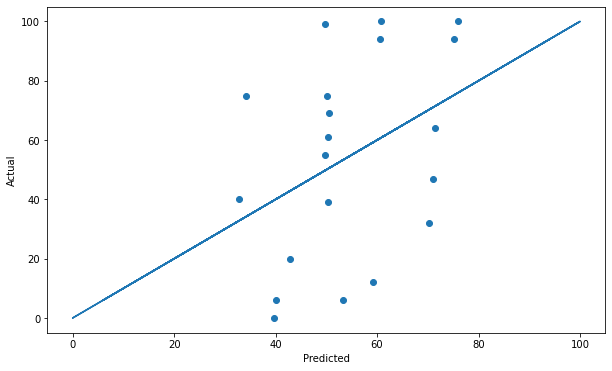

In [62]:
plt.figure(figsize=(10,6))

plt.scatter(predictions, actual)
plt.plot(actual, actual)

plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

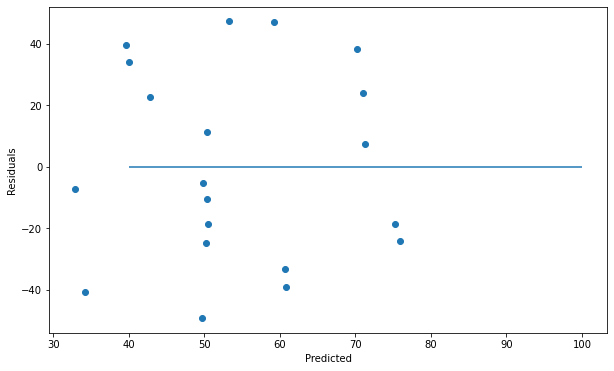

In [63]:
residuals = predictions - actual

plt.figure(figsize=(10,6))

plt.scatter(predictions, residuals)
plt.hlines(0, 40, 100)

plt.xlabel("Predicted")
plt.ylabel("Residuals")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.02412275531282808


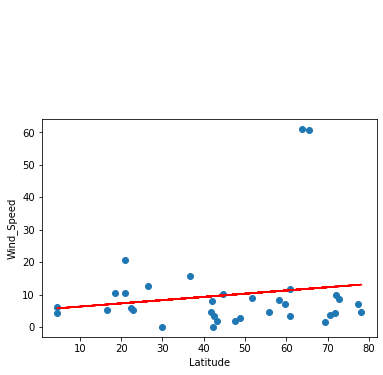

In [64]:
# Print out the r-squared value along with the plot.
x_values = df_north['Latitude']
y_values = df_north['Wind_Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(10,95),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind_Speed')

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [65]:
feature = df_north[["Latitude"]]
target = df_north["Wind_Speed"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Wind_Speed   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.7910
Date:                Sun, 06 Feb 2022   Prob (F-statistic):              0.380
Time:                        22:29:30   Log-Likelihood:                -136.28
No. Observations:                  34   AIC:                             276.6
Df Residuals:                      32   BIC:                             279.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2814      5.664      0.932      0.358      -6.256      16.818
Latitude       0.0994      0.112      0.889      0.380      -0.128       0.327
==============================================================================
Omnibus:                       42.531   Durbin-Watson:                   2.162
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.732
Skew:                           2.911   Prob(JB):                     4.55e-31
Kurtosis:                      11.047   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
reg = LinearRegression()
reg.fit(np.array(feature), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[0.09943943]
5.281371295995296


In [67]:
actual = df_north["Wind_Speed"]
predictions = reg.predict(df_north["Latitude"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: 0.02412275531282826
MSE: 177.48490875125535
RMSE: 13.322346217962336
MAE: 7.696869819763109


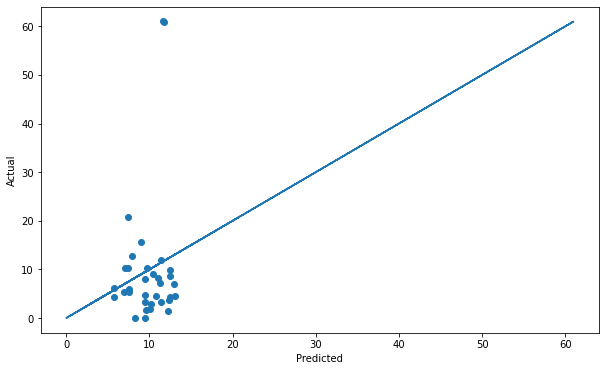

In [68]:
plt.figure(figsize=(10,6))

plt.scatter(predictions, actual)
plt.plot(actual, actual)

plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

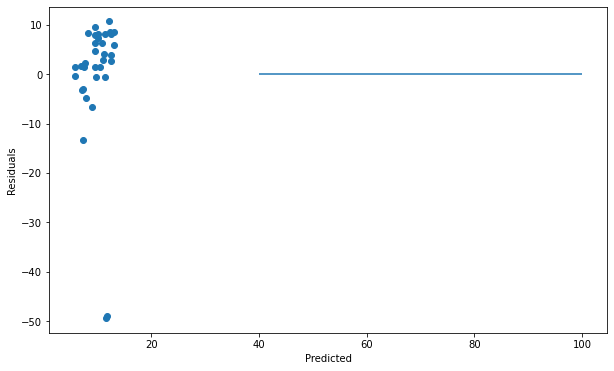

In [69]:
residuals = predictions - actual

plt.figure(figsize=(10,6))

plt.scatter(predictions, residuals)
plt.hlines(0, 40, 100)

plt.xlabel("Predicted")
plt.ylabel("Residuals")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0004863955287882552


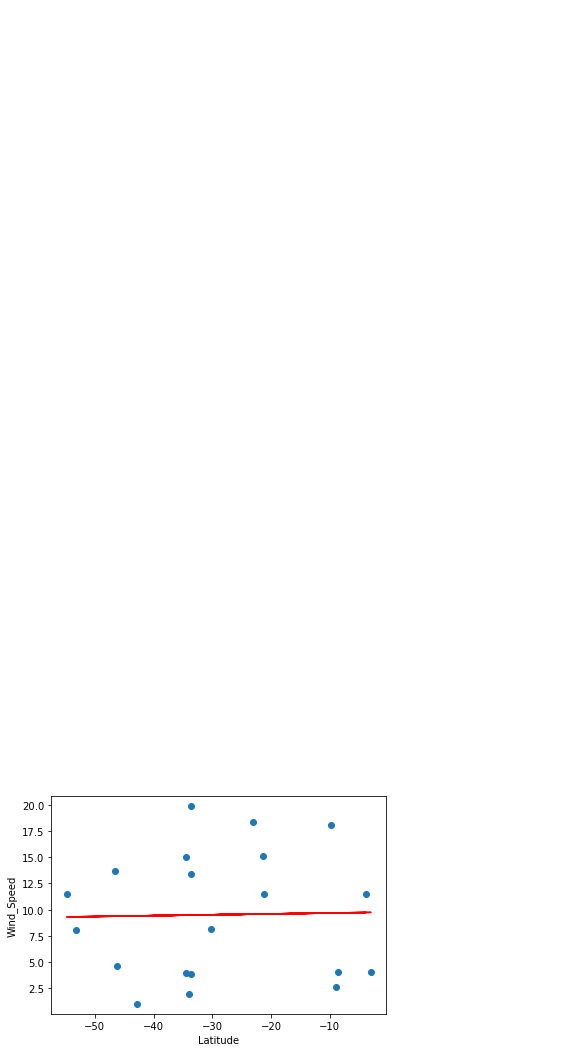

In [70]:
# Print out the r-squared value along with the plot.
x_values = df_south['Latitude']
y_values = df_south['Wind_Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(10,95),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind_Speed')

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [71]:
feature = df_south[["Latitude"]]
target = df_south["Wind_Speed"]

# STATSMODELS
X = sm.add_constant(feature)
Y = target

model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Wind_Speed   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.055
Method:                 Least Squares   F-statistic:                  0.008759
Date:                Sun, 06 Feb 2022   Prob (F-statistic):              0.926
Time:                        22:29:31   Log-Likelihood:                -63.791
No. Observations:                  20   AIC:                             131.6
Df Residuals:                      18   BIC:                             133.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7605      2.915      3.349      0.004       3.637      15.884
Latitude       0.0083      0.089      0.094      0.926      -0.178       0.195
==============================================================================
Omnibus:                        4.487   Durbin-Watson:                   1.664
Prob(Omnibus):                  0.106   Jarque-Bera (JB):                1.546
Skew:                           0.175   Prob(JB):                        0.462
Kurtosis:                       1.684   Cond. No.                         69.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
reg = LinearRegression()
reg.fit(np.array(feature), np.array(target))
print(reg.coef_)
print(reg.intercept_)

[0.00831685]
9.76053451304036


In [73]:
actual = df_south["Wind_Speed"]
predictions = reg.predict(df_south["Latitude"].values.reshape(-1, 1))

r2 = r2_score(actual, predictions)
mse = mean_squared_error(actual, predictions)
mae = mean_absolute_error(actual, predictions)

print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")

R2: 0.0004863955287880417
MSE: 34.50857176695582
RMSE: 5.8743996941777645
MAE: 5.27142451681796


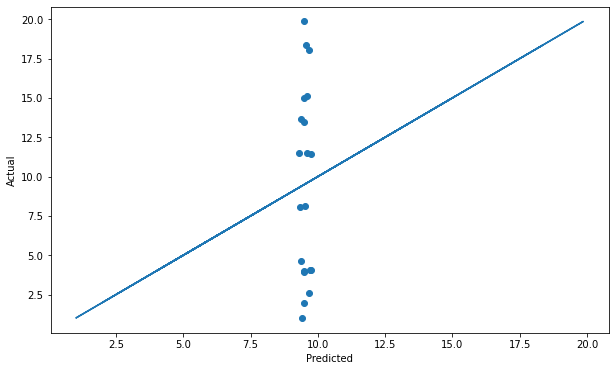

In [74]:
plt.figure(figsize=(10,6))

plt.scatter(predictions, actual)
plt.plot(actual, actual)

plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

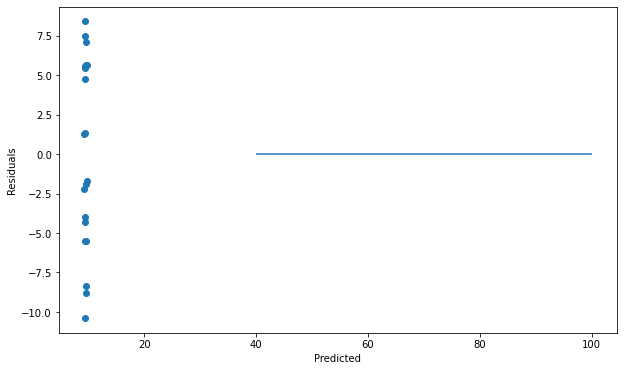

In [75]:
residuals = predictions - actual

plt.figure(figsize=(10,6))

plt.scatter(predictions, residuals)
plt.hlines(0, 40, 100)

plt.xlabel("Predicted")
plt.ylabel("Residuals")

plt.show()